<a href="https://colab.research.google.com/github/SenolIsci/ML-Model-Starters/blob/main/Extract_LSTM_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extract LSTM Encoder
Regardless of the method chosen (reconstruction, prediction, or composite), once the autoencoder has been fit, the decoder can be removed and the encoder can be kept as a standalone model.

The encoder can then be used to transform input sequences to a fixed length encoded vector.

We can do this by creating a new model that has the same inputs as our original model, and outputs directly from the end of encoder model, before the RepeatVector layer.

In [5]:
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
# define input sequence
sequence = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(sequence)
sequence = sequence.reshape((1, n_in, 1))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(sequence, sequence, epochs=300, verbose=0)
# connect the encoder LSTM as the output layer
model = Model(inputs=model.inputs, outputs=model.layers[0].output)

# get the feature vector for the input sequence
yhat = model.predict(sequence)
print(yhat.shape)
print(yhat)


1/1 [==============================] - 0s 158ms/step
(1, 100)
[[0.         0.         0.04009853 0.         0.06237762 0.
  0.         0.         0.05926038 0.         0.         0.
  0.01777113 0.07028631 0.04650023 0.11129661 0.         0.02187557
  0.         0.0583473  0.         0.         0.0791097  0.01871006
  0.         0.11849084 0.         0.06240441 0.02270241 0.
  0.09184257 0.         0.         0.08118322 0.07064191 0.
  0.         0.         0.         0.07500498 0.08546998 0.0338493
  0.         0.02220099 0.09252342 0.         0.02526845 0.
  0.         0.         0.01978844 0.         0.01856635 0.
  0.         0.         0.         0.         0.         0.0050782
  0.05472092 0.11489677 0.         0.         0.06859086 0.
  0.06271474 0.02566895 0.         0.0387726  0.04905013 0.07745542
  0.06308188 0.07511647 0.         0.03145407 0.01468875 0.05362952
  0.         0.         0.         0.03423287 0.07455906 0.
  0.         0.0936963  0.         0.0705509  0.1016

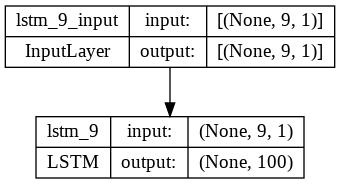

In [6]:
plot_model(model, show_shapes=True)